# ВК 

In [6]:
import pandas as pd
import datetime
import vk_api
import os
import requests
import json
import random

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [7]:
app_token = '8cc7f269593ee542dc56270f66438644e01852b5f2e3027438ab1b261102b85e12bff7c40daac89d52916'
# инициируем токен вк
my_id = 79928972
# инициируем наш id страницы
vk_session = vk_api.VkApi(token = app_token)
# инициализируем сессию с вк
vk = vk_session.get_api()
# делаем возможным использование методов апи вк как питоновских методов

Отправка сообщений

In [8]:
vk.messages.send(
            user_id = my_id,
            random_id = random.randint(1,2 ** 31),
            message = 'Итс ми, Илюша')

3

Отправка документов

In [10]:
path_to_file = '/home/jupyter-i.tsukanov-7/analytics/students.txt'
file_name = 'git_students.txt'
# создали файл для отправки
upload_url = vk.docs.getMessagesUploadServer(peer_id = my_id)['upload_url']
file = {'file':(file_name, open(path_to_file,'rb'))}

response = requests.post(upload_url, files = file)
# посылаем запрос на этот док в вк

json_data = json.loads(response.text)

saved_file = vk.docs.save(file = json_data['file'], title = file_name)
attachment = 'doc{}_{}'.format(saved_file['doc']['owner_id'], saved_file['doc']['id'])

vk.messages.send(
            user_id = my_id,
            random_id = random.randint(1,2 ** 31),
            message = 'Покушать принес', 
            attachment = attachment)

4

# Гугл

In [12]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials


# Specify path to your file with credentials
path_to_credential = 'credentials.json' 

# Specify name of table in google sheets
table_name = 'Test'

scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

credentials = ServiceAccountCredentials.from_json_keyfile_name(path_to_credential, scope)

gs = gspread.authorize(credentials)
work_sheet = gs.open(table_name)

# Select 1st sheet
sheet1 = work_sheet.sheet1

# Get data in python lists format
data = sheet1.get_all_values()

# Get header from data
headers = data.pop(0)

# Create df
df = pd.DataFrame(data, columns=headers)
df.head()

,Хз1,Итог
0,111,222
1,333,444


In [18]:
import pandas as pd
import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials


scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']


my_mail = 'ilyas.tsu@gmail.com'
path_to_credentials = 'credentials.json'


# Authorization
credentials = ServiceAccountCredentials.from_json_keyfile_name(path_to_credentials, scope)
gs = gspread.authorize(credentials)

# Загрузка таблицы из гугл доков


In [19]:
# Name of the table in google sheets,
# can be url for open_by_url
# or id (key) part for open_by_key
table_name = 'Test'  # Your table

# Get this table
work_sheet = gs.open(table_name)

# Select 1st sheet
sheet1 = work_sheet.sheet1

# Get data in python lists format
data = sheet1.get_all_values()

# Get header from data
headers = data.pop(0)

# Create df
df = pd.DataFrame(data, columns=headers)
df.head()

,Хз1,Итог
0,111,222
1,333,444


# Создание своей таблицы

In [20]:
# Create empty table
table_name = 'A new spreadsheet'

sheet = gs.create(table_name)

# Make it visible to other guys
sheet.share(my_mail, perm_type='user', role='writer')

# Экспорт датафрэйма в гугл доки
 

Для переноса датафрэйма в таблицу гугл дока, нужно, чтобы вы сделали эту таблицу из питона. Поэтому прогоните перед этой частью предыдущий раздел с желаемым названием таблицы

In [22]:
# Create your df
df = {'col1':[1,2,3], 'col2':[1,2,3]}
df = pd.DataFrame(data=df)

# Looks like spreadsheet should be already present at the dist (so, run code in create table section)
sheet = 'Master'
d2g.upload(df, table_name, sheet, credentials=credentials, row_names=True)

<Worksheet 'Master' id:540305617>

Для начала, давайте посмотрим на распределение посещений сайта по дням. Постройте график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика.

In [1]:
import pandas as pd
import requests
import json
import seaborn as sns

In [2]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/361618/step_1_lesson_7.csv')

In [3]:
df.head()

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0


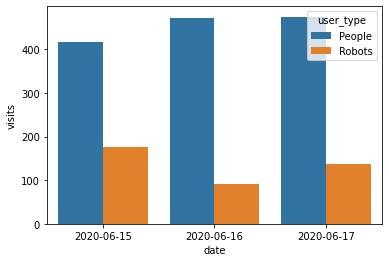

In [6]:
sns.barplot(x='date', y='visits', data = df, hue = 'user_type')

Определите процент посещений сайта Яндекс.Метрики с бразузера Google Chrome. Данные лежат здесь.

Ответ округлите до целого.

In [7]:
ya_metrics = pd.read_csv('https://stepik.org/media/attachments/lesson/361618/step_2_lesson_7.csv')

In [8]:
ya_metrics.head()

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0


In [13]:
visites_per_browser = ya_metrics.groupby('browser') \
    .agg({'visits':'sum'})
visites_per_browser

,visits
browser,
Android Browser,1.0
Chrome Mobile,31.0
Chromium,2.0
CocCoc,1.0
Edge,5.0
Firefox,58.0
Google Chrome,354.0
Mobile Safari,16.0
Opera,16.0


In [14]:
visites_per_browser.loc['Google Chrome'] \
    .div(visites_per_browser.sum()) \
    .mul(100) \
    .round(0)

visits    60.0
dtype: float64

Давайте выясним, с какого браузера приходит БОЛЬШЕ всего ботов. Посмотрите на данные и определите, у какого браузера самая БОЛЬШАЯ доля посещений сайта ботами от общего числа посещений?

В качестве ответа укажите название браузера.

In [15]:
daframe = pd.read_csv('https://stepik.org/media/attachments/lesson/361618/step_3_lesson_7.csv')

In [16]:
daframe.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [17]:
biggest_bots_browser = daframe.groupby('browser', as_index = False) \
    .agg({'visits':'sum'})
biggest_bots_browser

,browser,visits
0,Android Browser,1.0
1,Chrome Mobile,31.0
2,Chromium,2.0
3,CocCoc,1.0
4,Edge,5.0
5,Firefox,58.0
6,Google Chrome,354.0
7,Mobile Safari,16.0
8,Opera,16.0
9,Safari,41.0


In [18]:
full_daframe = daframe.merge(biggest_bots_browser, on = 'browser', suffixes = ('_type', '_all'))
full_daframe

,date,browser,user_type,visits_type,visits_all
0,2020-06-15,Google Chrome,People,250.0,354.0
1,2020-06-15,Google Chrome,Robots,104.0,354.0
2,2020-06-15,Yandex Browser,People,47.0,54.0
3,2020-06-15,Yandex Browser,Robots,7.0,54.0
4,2020-06-15,Firefox,Robots,31.0,58.0
5,2020-06-15,Firefox,People,27.0,58.0
6,2020-06-15,Chrome Mobile,People,31.0,31.0
7,2020-06-15,Safari,Robots,22.0,41.0
8,2020-06-15,Safari,People,19.0,41.0
9,2020-06-15,Mobile Safari,People,15.0,16.0


In [20]:
full_daframe['ratio'] = full_daframe.visits_type / full_daframe.visits_all
full_daframe

,date,browser,user_type,visits_type,visits_all,ratio
0,2020-06-15,Google Chrome,People,250.0,354.0,0.706215
1,2020-06-15,Google Chrome,Robots,104.0,354.0,0.293785
2,2020-06-15,Yandex Browser,People,47.0,54.0,0.870370
3,2020-06-15,Yandex Browser,Robots,7.0,54.0,0.129630
4,2020-06-15,Firefox,Robots,31.0,58.0,0.534483
5,2020-06-15,Firefox,People,27.0,58.0,0.465517
6,2020-06-15,Chrome Mobile,People,31.0,31.0,1.000000
7,2020-06-15,Safari,Robots,22.0,41.0,0.536585
8,2020-06-15,Safari,People,19.0,41.0,0.463415
9,2020-06-15,Mobile Safari,People,15.0,16.0,0.937500


In [21]:
full_daframe.query('user_type == "Robots"') \
    .nlargest(1, columns = 'ratio')

,date,browser,user_type,visits_type,visits_all,ratio
15,2020-06-15,UCWEB,Robots,4.0,4.0,1.0


Выгрузите данные, содержащие информацию о дне, типе пользователя, браузере, создайте колонку с метрикой доли заходов на сайт для каждого из этих разрезов.

В ответе укажите процент открытий сайта настоящими пользователями Safari (не ботами) с точностью до 1 знака после точки.

Hint: обратите внимание, здесь вам нужно найти долю заходов конкретных типов пользователей с конкретного браузера от вообще всех-всех заходов на сайт за этот день.

In [22]:
safari_browser = pd.read_csv('https://stepik.org/media/attachments/lesson/361618/step_4_lesson_7.csv')

In [23]:
safari_browser.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [24]:
safari_browser['percent'] = safari_browser.visits / safari_browser.visits.sum() * 100
safari_browser.head()

,date,browser,user_type,visits,percent
0,2020-06-15,Google Chrome,People,250.0,42.087542
1,2020-06-15,Google Chrome,Robots,104.0,17.508418
2,2020-06-15,Yandex Browser,People,47.0,7.912458
3,2020-06-15,Firefox,Robots,31.0,5.218855
4,2020-06-15,Chrome Mobile,People,31.0,5.218855


In [26]:
safari_browser.query('user_type == "People" & browser == "Safari"') \
    .percent.round(1)

7    3.2
Name: percent, dtype: float64

💀 Сложное задание! 💀

При помощи библиотеки gspread отправьте данные из предыдущего шага в Google SpreadSheet. Далее отправьте ссылку на получившийся файл в Google SpreadSheet (не забудьте открыть доступ по ссылке, это можно сделать вручную, когда данные уже зальются в таблицу) при помощи vk api себе в личку ВКонтакте. 

В ответ к этому степу напишите слово Да, если всё сделали :)

⭐️Задание со звёздочкой!⭐️

Другой аналитик уже агрегировал часть данных из метрики, и вам нужно объединить усилия, чтобы получить финальный отчет. Прочитайте дополнительные данные из Google SpreadSheet, объедините вашу таблицу из предыдущего шага с таблицей аналитика и посчитайте количество визитов на человека (отношение visits к users) в разрезе по браузеру и значениям Robots/People.

В ответе укажите, сколько визитов на уникального пользователя совершается ботами с браузера Google Chrome (округлите до целого)

Вот так можно прочитать данные другого аналитика:

from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df = pd.read_csv(BytesIO(data))

In [27]:
from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df = pd.read_csv(BytesIO(data))

In [28]:
df.head()

,date,browser,user_type,users
0,2020-06-15,Google Chrome,People,240.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,44.0
3,2020-06-15,Chrome Mobile,People,30.0
4,2020-06-15,Firefox,Robots,29.0


In [30]:
full_data = df.merge(daframe, on=['date','browser','user_type'])
full_data.head()

,date,browser,user_type,users,visits
0,2020-06-15,Google Chrome,People,240.0,250.0
1,2020-06-15,Google Chrome,Robots,104.0,104.0
2,2020-06-15,Yandex Browser,People,44.0,47.0
3,2020-06-15,Chrome Mobile,People,30.0,31.0
4,2020-06-15,Firefox,Robots,29.0,31.0


In [31]:
full_data['ratio'] = full_data.visits / full_data.users

In [32]:
full_data.query('browser =="Google Chrome" and user_type =="Robots"')

,date,browser,user_type,users,visits,ratio
1,2020-06-15,Google Chrome,Robots,104.0,104.0,1.0
